<a href="https://colab.research.google.com/github/lisabroadhead/data_science_machine-learning/blob/main/Regression_Tree_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Tree Exercise (Practice)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
file = '/content/drive/MyDrive/Colab Notebooks/coding_dojo/Machine Learning/files/Boston_Housing_from_Sklearn.csv'

df = pd.read_csv(file)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [3]:
y = df['PRICE']
X = df.drop(columns='PRICE')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 1. Run a regression tree model with default parameters (unlimited depth)

In [13]:
dec_tree = DecisionTreeRegressor(random_state=42)

In [14]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [15]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [16]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test,y_test)

print(train_score)
print(test_score)

1.0
0.6193230918136841


## 2. Determine the depth of the default tree

In [8]:
dec_tree.get_depth()

20

## 3. Try different values for max_depth and determine the optimal value based on the best (highest) r2 value. What is the optimal max_depth based on your trials?

In [9]:
depths = list(range(1, 20))
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_test, y_test)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

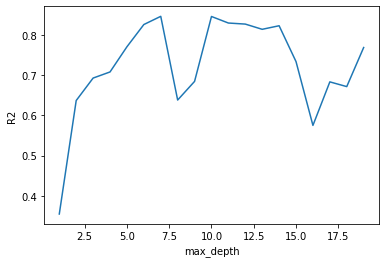

In [10]:
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [11]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
7,0.846377,0.846377
10,0.84601,0.84601
11,0.829736,0.829736
12,0.827102,0.827102
6,0.825985,0.825985


#### What is the optimal max_depth based on your trials?
When the max_depth was at 7 because both the train and the test data are high. As high as they can do



## 4. What is the r2 of your final model on the training set and on the test set?

In [21]:
dec_tree_two = DecisionTreeRegressor(max_depth = 7, random_state=42)
dec_tree_two.fit(X_train, y_train)

train_r2 = dec_tree_two.score(X_train, y_train)
test_r2 = dec_tree_two.score(X_test, y_test)

print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

Train R2: 0.958516936961625
Test R2: 0.8463768203632204
